In [259]:
#importing all necessary libraries for our model
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
#loading our dataset

data = pd.read_csv("onlinefoods.csv")
data.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [261]:
#exploratory data analysis
print(data.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')


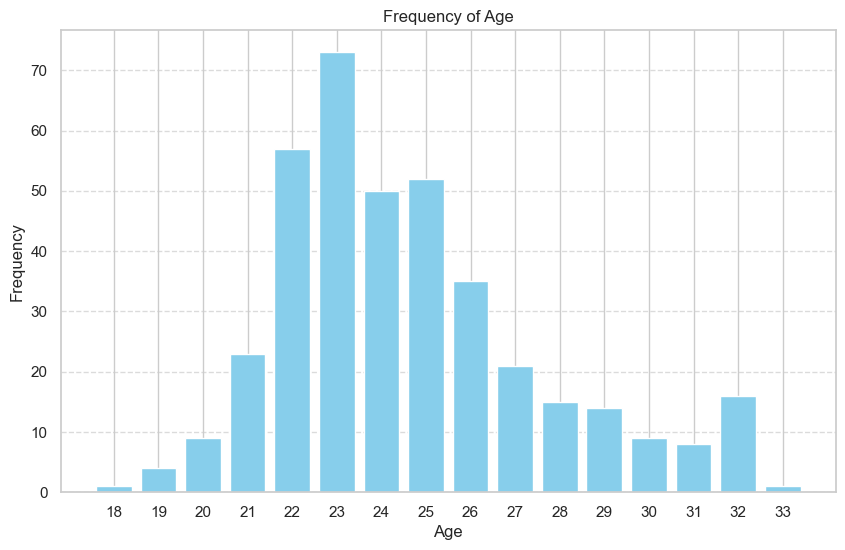

In [262]:
# Calculate frequency of each age
age_freq = data['Age'].value_counts()

# Sort by age for better visualization
age_freq = age_freq.sort_index()

# Create column chart
plt.figure(figsize=(10, 6))
plt.bar(age_freq.index, age_freq.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age')
plt.xticks(age_freq.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

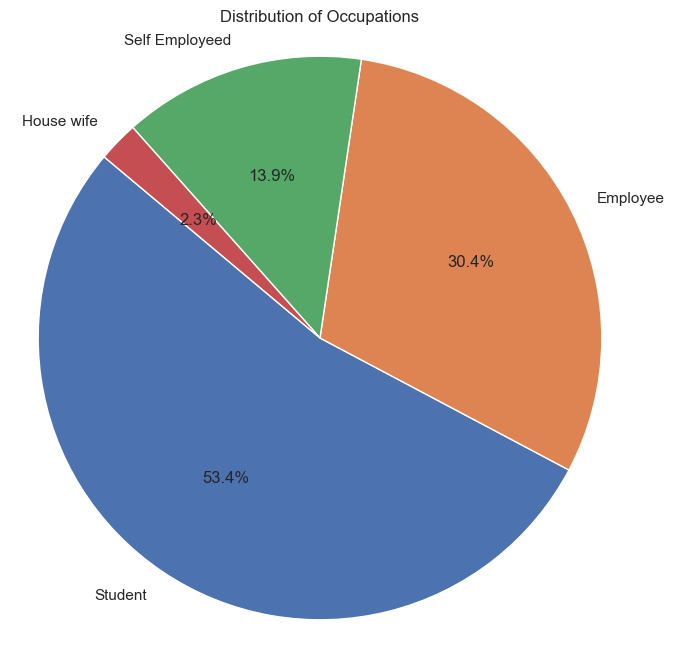

In [263]:
# Calculate frequency of each occupation
occupation_freq = data['Occupation'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_freq, labels=occupation_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Occupations')
plt.axis('equal') 
plt.show()

In [264]:
## Training the model
X = data[['Age', 'Monthly Income', 'Output']]

y = data['Feedback']

X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200)
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200)

In [265]:
# Predictions on training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9258064516129032
Test Accuracy: 0.8974358974358975


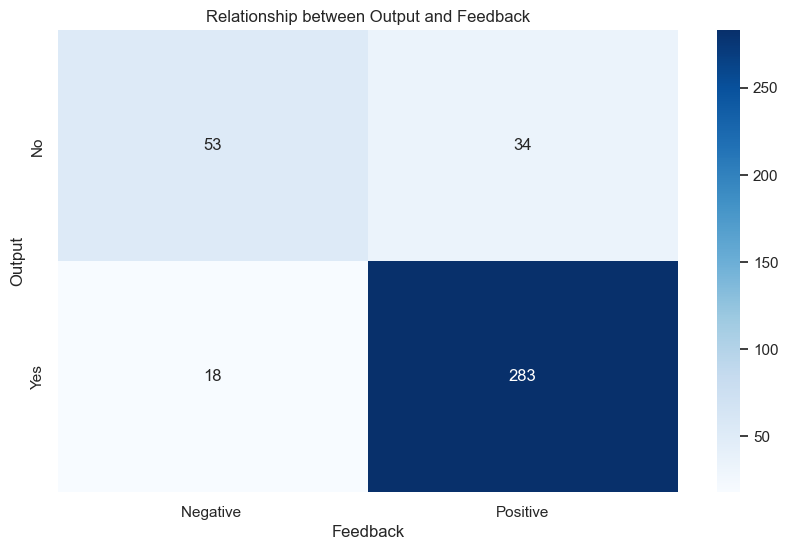

In [266]:
# Create a cross-tabulation of 'Output' and 'Feedback'
cross_tab = pd.crosstab(data['Output'], data['Feedback'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship between Output and Feedback')
plt.xlabel('Feedback')
plt.ylabel('Output')
plt.show()